In [102]:
import pandas as pd
import seaborn as sns

In [103]:
data = pd.read_pickle("preparedData.pkl")
data_original=data.copy()
data
#kWhDelivered, 	timeConnected, idleTime, chargingTime
#weekday
#minutesavailable, WhPerMile, kWhRequested


connectionTime            disconnectTime  \
0     2020-01-02 13:08:54+00:00 2020-01-02 19:11:15+00:00   
1     2020-01-02 13:36:50+00:00 2020-01-02 22:38:21+00:00   
2     2020-01-02 13:56:35+00:00 2020-01-03 00:39:22+00:00   
3     2020-01-02 13:59:58+00:00 2020-01-02 16:38:39+00:00   
4     2020-01-02 14:00:01+00:00 2020-01-02 22:08:40+00:00   
...                         ...                       ...   
56531 2019-07-01 19:13:11+00:00 2019-07-02 00:44:40+00:00   
56532 2019-07-01 19:43:46+00:00 2019-07-02 02:58:53+00:00   
56533 2019-07-01 20:34:30+00:00 2019-07-02 00:30:52+00:00   
56534 2019-07-01 21:49:12+00:00 2019-07-02 01:37:18+00:00   
56535 2019-07-01 22:36:08+00:00 2019-07-02 01:10:52+00:00   

               doneChargingTime  kWhDelivered  siteID  userID  \
0     2020-01-02 17:31:35+00:00        25.016       1   194.0   
1     2020-01-02 20:18:05+00:00        33.097       1  4275.0   
2     2020-01-02 16:35:06+00:00         6.521       1   344.0   
3     2020-01-02 15:18:45+00:00         2.355       1  1117.0   
4     2020-01-02 18:17:30+00:00        13.375       1   334.0   
...                         ...           ...     ...     ...   
56531 2019-07-01 21:13:56+00:00         6.048       1  2643.0   
56532 2019-07-02 02:43:53+00:00        41.047       1   394.0   
56533 2019-07-01 21:27:44+00:00         5.390       1  2276.0   
56534 2019-07-01 23:14:33+00:00         8.399       1  1346.0   
56535 2019-07-02 00:24:32+00:00        10.241       1  2299.0   

      combinedSpaceStationID  timeConnected  idleTime  chargingTime  weekday  \
0        AG-3F30/1-1-179-810        21741.0    5980.0       15761.0        3   
1        AG-1F01/1-1-193-825        32491.0    8416.0       24075.0        3   
2        AG-1F03/1-1-193-829        38567.0   29056.0        9511.0        3   
3        AG-1F04/1-1-193-820         9521.0    4794.0        4727.0        3   
4        AG-1F06/1-1-193-819        29319.0   13870.0       15449.0        3   
...                      ...            ...       ...           ...      ...   
56531    AG-3F23/1-1-179-797        19889.0   12644.0        7245.0        0   
56532    AG-4F38/1-1-191-793        26107.0     900.0       25207.0        0   
56533    AG-3F15/1-1-179-813        14182.0   10988.0        3194.0        0   
56534    AG-3F18/1-1-179-798        13686.0    8565.0        5121.0        0   
56535    AG-1F06/1-1-193-819         9284.0    2780.0        6504.0        0   

       month      time  WhPerMile  kWhRequested  milesRequested  \
0          1  13:08:54      250.0         25.00           100.0   
1          1  13:36:50      280.0         70.00           250.0   
2          1  13:56:35      400.0          8.00            20.0   
3          1  13:59:58      400.0          8.00            20.0   
4          1  14:00:01      400.0         16.00            40.0   
...      ...       ...        ...           ...             ...   
56531      7  19:13:11      275.0          8.25            30.0   
56532      7  19:43:46      231.0         36.96           160.0   
56533      7  20:34:30      300.0         12.00            40.0   
56534      7  21:49:12      400.0         32.00            80.0   
56535      7  22:36:08      333.0         16.65            50.0   

       minutesAvailable                     modifiedAt paymentRequired  \
0                 463.0  Thu, 02 Jan 2020 13:09:39 GMT            True   
1                 595.0  Thu, 02 Jan 2020 13:37:11 GMT            True   
2                  60.0  Thu, 02 Jan 2020 13:57:17 GMT            True   
3                  65.0  Thu, 02 Jan 2020 14:00:03 GMT            True   
4                 504.0  Thu, 02 Jan 2020 14:00:13 GMT            True   
...                 ...                            ...             ...   
56531             374.0  Mon, 01 Jul 2019 19:13:10 GMT            True   
56532             310.0  Mon, 01 Jul 2019 19:43:58 GMT            True   
56533             381.0  Mon, 01 Jul 2019 20:34:29 GMT            True 

In [104]:
#drop caterorical information
#ids:

In [105]:
# Create a second DataFrame 'data_with_nulls' with rows where either 'userID' or 'kWhDelivered' have null values
unsubscribed_df = data[data['userID'].isnull()]


In [106]:
# Drop the 'userID' and 'kWhDelivered' columns from 'data_with_nulls'
unsubscribed_df = unsubscribed_df.drop(['userID', 'kWhDelivered','kWhRequested','milesRequested','WhPerMile','minutesAvailable','modifiedAt','paymentRequired','requestedDeparture'], axis=1)


In [107]:
unsubscribed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15227 entries, 11 to 56493
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          15227 non-null  datetime64[ns, UTC]
 1   disconnectTime          15227 non-null  datetime64[ns, UTC]
 2   doneChargingTime        15227 non-null  datetime64[ns, UTC]
 3   siteID                  15227 non-null  int64              
 4   combinedSpaceStationID  15227 non-null  object             
 5   timeConnected           15227 non-null  float64            
 6   idleTime                15227 non-null  float64            
 7   chargingTime            15227 non-null  float64            
 8   weekday                 15227 non-null  int32              
 9   month                   15227 non-null  int32              
 10  time                    15227 non-null  object             
dtypes: datetime64[ns, UTC](3), float64(3), int32(

In [108]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41309 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          41309 non-null  datetime64[ns, UTC]
 1   disconnectTime          41309 non-null  datetime64[ns, UTC]
 2   doneChargingTime        41309 non-null  datetime64[ns, UTC]
 3   kWhDelivered            41309 non-null  float64            
 4   siteID                  41309 non-null  int64              
 5   userID                  41309 non-null  float64            
 6   combinedSpaceStationID  41309 non-null  object             
 7   timeConnected           41309 non-null  float64            
 8   idleTime                41309 non-null  float64            
 9   chargingTime            41309 non-null  float64            
 10  weekday                 41309 non-null  int32              
 11  month                   41309 non-null  int32 

In [109]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41309 entries, 0 to 56535
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   connectionTime          41309 non-null  datetime64[ns, UTC]
 1   disconnectTime          41309 non-null  datetime64[ns, UTC]
 2   doneChargingTime        41309 non-null  datetime64[ns, UTC]
 3   kWhDelivered            41309 non-null  float64            
 4   siteID                  41309 non-null  int64              
 5   userID                  41309 non-null  float64            
 6   combinedSpaceStationID  41309 non-null  object             
 7   timeConnected           41309 non-null  float64            
 8   idleTime                41309 non-null  float64            
 9   chargingTime            41309 non-null  float64            
 10  weekday                 41309 non-null  int32              
 11  month                   41309 non-null  int32 

In [110]:
data['hour']=data['connectionTime'].dt.hour
#disconnecttime raus
#ids raus
#doneChargingTime raus
#drop: modifiedAt	paymentRequired	requestedDeparture
data = data.drop(['userID','siteID','doneChargingTime','disconnectTime','modifiedAt','paymentRequired','requestedDeparture','connectionTime','combinedSpaceStationID'], axis=1)

In [111]:
# read in weather data

weather = pd.read_csv("weather_burbank_airport.csv")
weather

city            timestamp  temperature  cloud_cover  \
0      Burbank  2018-01-01 08:53:00          9.0         33.0   
1      Burbank  2018-01-01 09:53:00          9.0         33.0   
2      Burbank  2018-01-01 10:53:00          9.0         21.0   
3      Burbank  2018-01-01 11:53:00          9.0         29.0   
4      Burbank  2018-01-01 12:53:00          8.0         33.0   
...        ...                  ...          ...          ...   
29239  Burbank  2021-01-01 03:53:00         13.0         33.0   
29240  Burbank  2021-01-01 04:53:00         12.0         33.0   
29241  Burbank  2021-01-01 05:53:00         12.0         33.0   
29242  Burbank  2021-01-01 06:53:00         11.0         33.0   
29243  Burbank  2021-01-01 07:53:00         10.0         33.0   

      cloud_cover_description  pressure  windspeed  precipitation  \
0                        Fair    991.75        9.0            0.0   
1                        Fair    992.08        0.0            0.0   
2                        Haze    992.08        0.0            0.0   
3               Partly Cloudy    992.08        0.0            0.0   
4                        Fair    992.08        0.0            0.0   
...                       ...       ...        ...            ...   
29239                    Fair    986.81        0.0            0.0   
29240                    Fair    986.81       11.0            0.0   
29241                    Fair    987.47        9.0            0.0   
29242                    Fair    987.14       13.0            0.0   
29243                    Fair    987.80        6.0            0.0   

       felt_temperature  
0                   8.0  
1                   9.0  
2                   9.0  
3                   9.0  
4                   8.0  
...                 ...  
29239              13.0  
29240              12.0  
29241              12.0  
29242              11.0  
29243              10.0  

[29244 rows x 9 columns]

In [112]:
weather = weather.drop(['city', 'cloud_cover', 'cloud_cover_description', 'pressure', 'windspeed', 'felt_temperature'], axis=1)
weather

timestamp  temperature  precipitation
0      2018-01-01 08:53:00          9.0            0.0
1      2018-01-01 09:53:00          9.0            0.0
2      2018-01-01 10:53:00          9.0            0.0
3      2018-01-01 11:53:00          9.0            0.0
4      2018-01-01 12:53:00          8.0            0.0
...                    ...          ...            ...
29239  2021-01-01 03:53:00         13.0            0.0
29240  2021-01-01 04:53:00         12.0            0.0
29241  2021-01-01 05:53:00         12.0            0.0
29242  2021-01-01 06:53:00         11.0            0.0
29243  2021-01-01 07:53:00         10.0            0.0

[29244 rows x 3 columns]

In [113]:
#convert timestamp attribute into datetime type and drop old timestamp attribute

weather["dateTime"] = pd.to_datetime(weather['timestamp'])
weather = weather.drop(['timestamp'], axis=1)
weather

temperature  precipitation            dateTime
0              9.0            0.0 2018-01-01 08:53:00
1              9.0            0.0 2018-01-01 09:53:00
2              9.0            0.0 2018-01-01 10:53:00
3              9.0            0.0 2018-01-01 11:53:00
4              8.0            0.0 2018-01-01 12:53:00
...            ...            ...                 ...
29239         13.0            0.0 2021-01-01 03:53:00
29240         12.0            0.0 2021-01-01 04:53:00
29241         12.0            0.0 2021-01-01 05:53:00
29242         11.0            0.0 2021-01-01 06:53:00
29243         10.0            0.0 2021-01-01 07:53:00

[29244 rows x 3 columns]

In [114]:
# drop duplicates in weather to ensure correct merge of both dataframes 

weather.drop_duplicates(subset='dateTime', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 41309 entries, 0 to 56535
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kWhDelivered      41309 non-null  float64
 1   timeConnected     41309 non-null  float64
 2   idleTime          41309 non-null  float64
 3   chargingTime      41309 non-null  float64
 4   weekday           41309 non-null  int32  
 5   month             41309 non-null  int32  
 6   time              41309 non-null  object 
 7   WhPerMile         41309 non-null  float64
 8   kWhRequested      41309 non-null  float64
 9   milesRequested    41309 non-null  float64
 10  minutesAvailable  41309 non-null  float64
 11  hour              41309 non-null  int32  
dtypes: float64(8), int32(3), object(1)
memory usage: 3.6+ MB


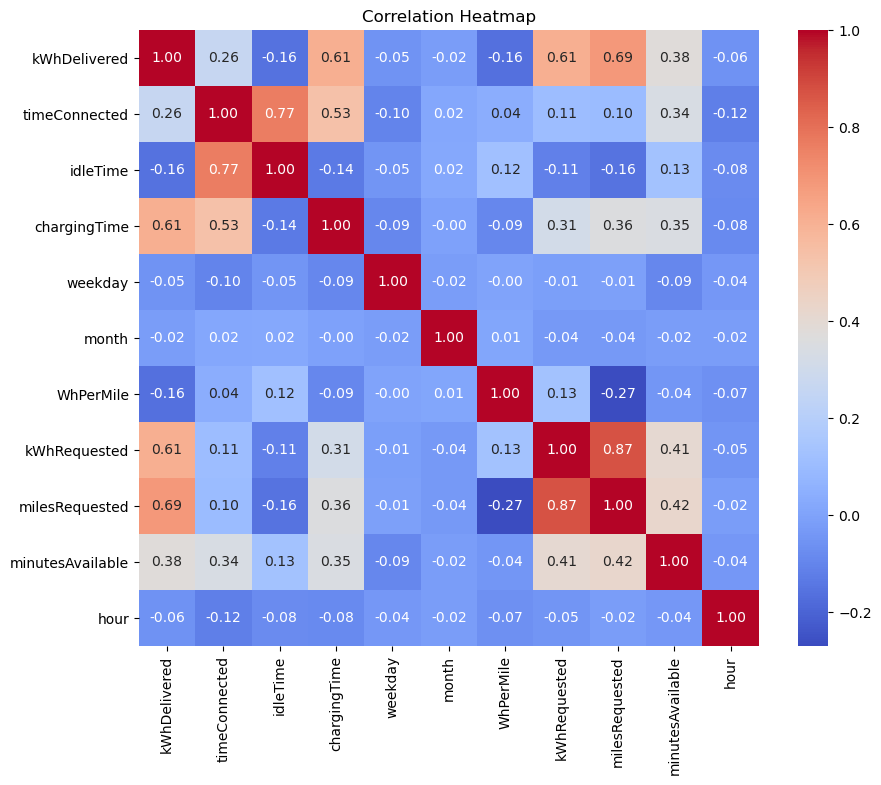

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate or load your DataFrame 'data' here
data.info()

# Remove non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.describe()
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


In [116]:
correlation_matrix

kWhDelivered  timeConnected  idleTime  chargingTime  \
kWhDelivered          1.000000       0.262021 -0.157358      0.609741   
timeConnected         0.262021       1.000000  0.765099      0.534265   
idleTime             -0.157358       0.765099  1.000000     -0.135545   
chargingTime          0.609741       0.534265 -0.135545      1.000000   
weekday              -0.052976      -0.102343 -0.048040     -0.094407   
month                -0.021284       0.015448  0.021656     -0.004660   
WhPerMile            -0.162864       0.039848  0.117844     -0.093390   
kWhRequested          0.612627       0.106109 -0.112888      0.311464   
milesRequested        0.685698       0.098237 -0.155774      0.355652   
minutesAvailable      0.377159       0.337100  0.129130      0.349168   
hour                 -0.061427      -0.120934 -0.078663     -0.082810   

                   weekday     month  WhPerMile  kWhRequested  milesRequested  \
kWhDelivered     -0.052976 -0.021284  -0.162864      0.612627        0.685698   
timeConnected    -0.102343  0.015448   0.039848      0.106109        0.098237   
idleTime         -0.048040  0.021656   0.117844     -0.112888       -0.155774   
chargingTime     -0.094407 -0.004660  -0.093390      0.311464        0.355652   
weekday           1.000000 -0.020881  -0.002576     -0.013813       -0.012422   
month            -0.020881  1.000000   0.010129     -0.036495       -0.036437   
WhPerMile        -0.002576  0.010129   1.000000      0.127928       -0.270614   
kWhRequested     -0.013813 -0.036495   0.127928      1.000000        0.873915   
milesRequested   -0.012422 -0.036437  -0.270614      0.873915        1.000000   
minutesAvailable -0.093781 -0.019745  -0.043399      0.407138        0.424038   
hour             -0.041503 -0.021938  -0.066064     -0.048188       -0.021277   

                  minutesAvailable      hour  
kWhDelivered              0.377159 -0.061427  
timeConnected             0.337100 -0.120934  
idleTime                  0.129130 -0.078663  
chargingTime              0.349168 -0.082810  
weekday                  -0.093781 -0.041503  
month                    -0.019745 -0.021938  
WhPerMile                -0.043399 -0.066064  
kWhRequested              0.407138 -0.048188  
milesRequested            0.424038 -0.021277  
minutesAvailable          1.000000 -0.040606  
hour                     -0.040606  1.000000

In [121]:
#drop highly correlated features
data=data.drop(['timeConnected','milesRequested'], axis=1)

In [122]:
# #drop high correlated features
# import pandas as pd
# import numpy as np

# # Generate or load your DataFrame 'data' here

# # Remove non-numeric columns from the DataFrame
# numeric_data = data.select_dtypes(include=[np.number])

# # Calculate the correlation matrix
# correlation_matrix = numeric_data.corr()

# # Define a threshold for correlation
# threshold = 0.7  # Adjust this threshold as needed

# # Find pairs of highly correlated features
# highly_correlated_pairs = np.where(np.abs(correlation_matrix) > threshold)

# # Create a set to keep track of columns to drop
# columns_to_drop = set()

# # Iterate through the pairs of highly correlated features and decide which ones to drop
# for i, j in zip(*highly_correlated_pairs):
#     if i != j:
#         feature_i = numeric_data.columns[i]
#         feature_j = numeric_data.columns[j]
#         # Drop one of the features based on your choice
#         # You can add your logic here to decide which feature to drop
#         # For example, you can drop the one with lower importance in your analysis
#         columns_to_drop.add(feature_i)  # Drop feature_i
#         # columns_to_drop.add(feature_j)  # Or drop feature_j if you prefer

# # Drop the highly correlated columns from the DataFrame
# data.drop(columns=columns_to_drop, inplace=True)

# # Now, your DataFrame 'data' should have the highly correlated features removed.


In [123]:
correlation_matrix

kWhDelivered  timeConnected  idleTime  chargingTime  \
kWhDelivered          1.000000       0.262021 -0.157358      0.609741   
timeConnected         0.262021       1.000000  0.765099      0.534265   
idleTime             -0.157358       0.765099  1.000000     -0.135545   
chargingTime          0.609741       0.534265 -0.135545      1.000000   
weekday              -0.052976      -0.102343 -0.048040     -0.094407   
month                -0.021284       0.015448  0.021656     -0.004660   
WhPerMile            -0.162864       0.039848  0.117844     -0.093390   
kWhRequested          0.612627       0.106109 -0.112888      0.311464   
milesRequested        0.685698       0.098237 -0.155774      0.355652   
minutesAvailable      0.377159       0.337100  0.129130      0.349168   
hour                 -0.061427      -0.120934 -0.078663     -0.082810   

                   weekday     month  WhPerMile  kWhRequested  milesRequested  \
kWhDelivered     -0.052976 -0.021284  -0.162864      0.612627        0.685698   
timeConnected    -0.102343  0.015448   0.039848      0.106109        0.098237   
idleTime         -0.048040  0.021656   0.117844     -0.112888       -0.155774   
chargingTime     -0.094407 -0.004660  -0.093390      0.311464        0.355652   
weekday           1.000000 -0.020881  -0.002576     -0.013813       -0.012422   
month            -0.020881  1.000000   0.010129     -0.036495       -0.036437   
WhPerMile        -0.002576  0.010129   1.000000      0.127928       -0.270614   
kWhRequested     -0.013813 -0.036495   0.127928      1.000000        0.873915   
milesRequested   -0.012422 -0.036437  -0.270614      0.873915        1.000000   
minutesAvailable -0.093781 -0.019745  -0.043399      0.407138        0.424038   
hour             -0.041503 -0.021938  -0.066064     -0.048188       -0.021277   

                  minutesAvailable      hour  
kWhDelivered              0.377159 -0.061427  
timeConnected             0.337100 -0.120934  
idleTime                  0.129130 -0.078663  
chargingTime              0.349168 -0.082810  
weekday                  -0.093781 -0.041503  
month                    -0.019745 -0.021938  
WhPerMile                -0.043399 -0.066064  
kWhRequested              0.407138 -0.048188  
milesRequested            0.424038 -0.021277  
minutesAvailable          1.000000 -0.040606  
hour                     -0.040606  1.000000

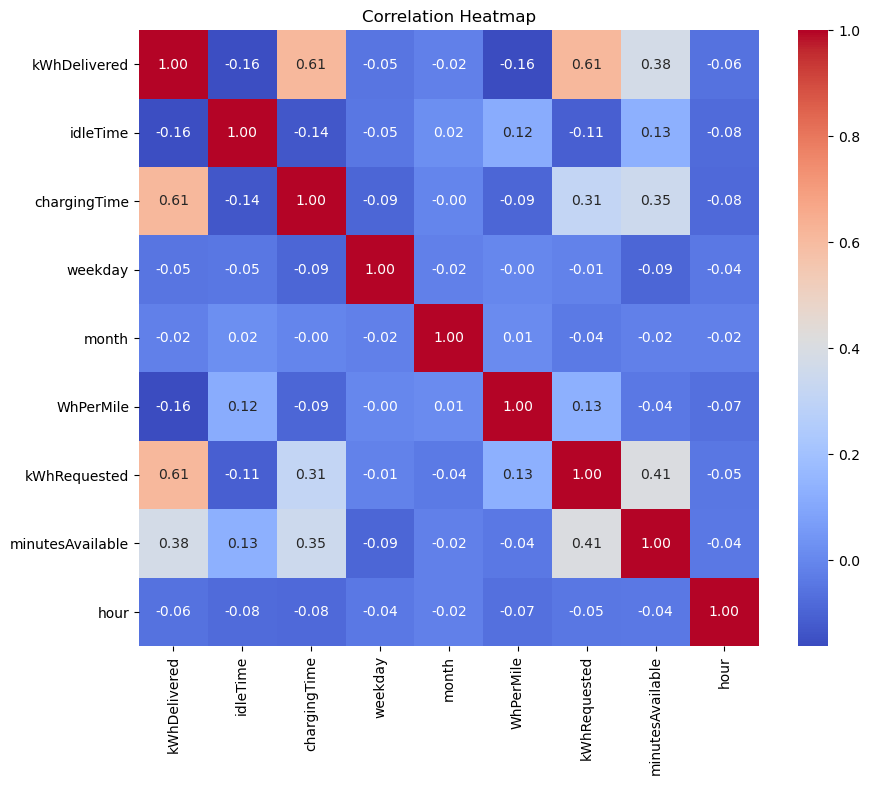

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()

### The df we are now using is the merged cleaned dataset with only numerical data: **numeric_data**

**First let's normalize**

In [127]:
data=data.drop(['time'], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 41309 entries, 0 to 56535
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kWhDelivered      41309 non-null  float64
 1   idleTime          41309 non-null  float64
 2   chargingTime      41309 non-null  float64
 3   weekday           41309 non-null  int32  
 4   month             41309 non-null  int32  
 5   WhPerMile         41309 non-null  float64
 6   kWhRequested      41309 non-null  float64
 7   minutesAvailable  41309 non-null  float64
 8   hour              41309 non-null  int32  
dtypes: float64(6), int32(3)
memory usage: 2.7 MB


In [138]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your original DataFrame
scaler = MinMaxScaler()
()

# Fit and transform the data
data_scaled = scaler.fit_transform(data)

# Create a new DataFrame with the scaled values
data_scaled = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)
data_scaled.head()


kWhDelivered  idleTime  chargingTime  weekday  month  WhPerMile  \
0      0.326731  0.010640      0.021806      0.5    0.0   0.102564   
1      0.434442  0.014974      0.033353      0.5    0.0   0.117949   
2      0.080213  0.051698      0.013125      0.5    0.0   0.179487   
3      0.024685  0.008530      0.006481      0.5    0.0   0.179487   
4      0.171569  0.024678      0.021372      0.5    0.0   0.179487   

   kWhRequested  minutesAvailable      hour  
0      0.116106          0.241632  0.565217  
1      0.325098          0.310669  0.565217  
2      0.037154          0.030858  0.565217  
3      0.037154          0.033473  0.565217  
4      0.074308          0.263075  0.608696

In [139]:
# Reorder the columns in the DataFrame
logical_order = [
    'hour',
    'weekday',
    'month',
    'idleTime',
    'chargingTime',
    'minutesAvailable',
    'kWhDelivered',
    'kWhRequested',
    'WhPerMile'
]

# Create a new DataFrame with the reordered columns
data_scaled = data_scaled[logical_order]
data_scaled.head()


hour  weekday  month  idleTime  chargingTime  minutesAvailable  \
0  0.565217      0.5    0.0  0.010640      0.021806          0.241632   
1  0.565217      0.5    0.0  0.014974      0.033353          0.310669   
2  0.565217      0.5    0.0  0.051698      0.013125          0.030858   
3  0.565217      0.5    0.0  0.008530      0.006481          0.033473   
4  0.608696      0.5    0.0  0.024678      0.021372          0.263075   

   kWhDelivered  kWhRequested  WhPerMile  
0      0.326731      0.116106   0.102564  
1      0.434442      0.325098   0.117949  
2      0.080213      0.037154   0.179487  
3      0.024685      0.037154   0.179487  
4      0.171569      0.074308   0.179487

C:\Users\berra\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


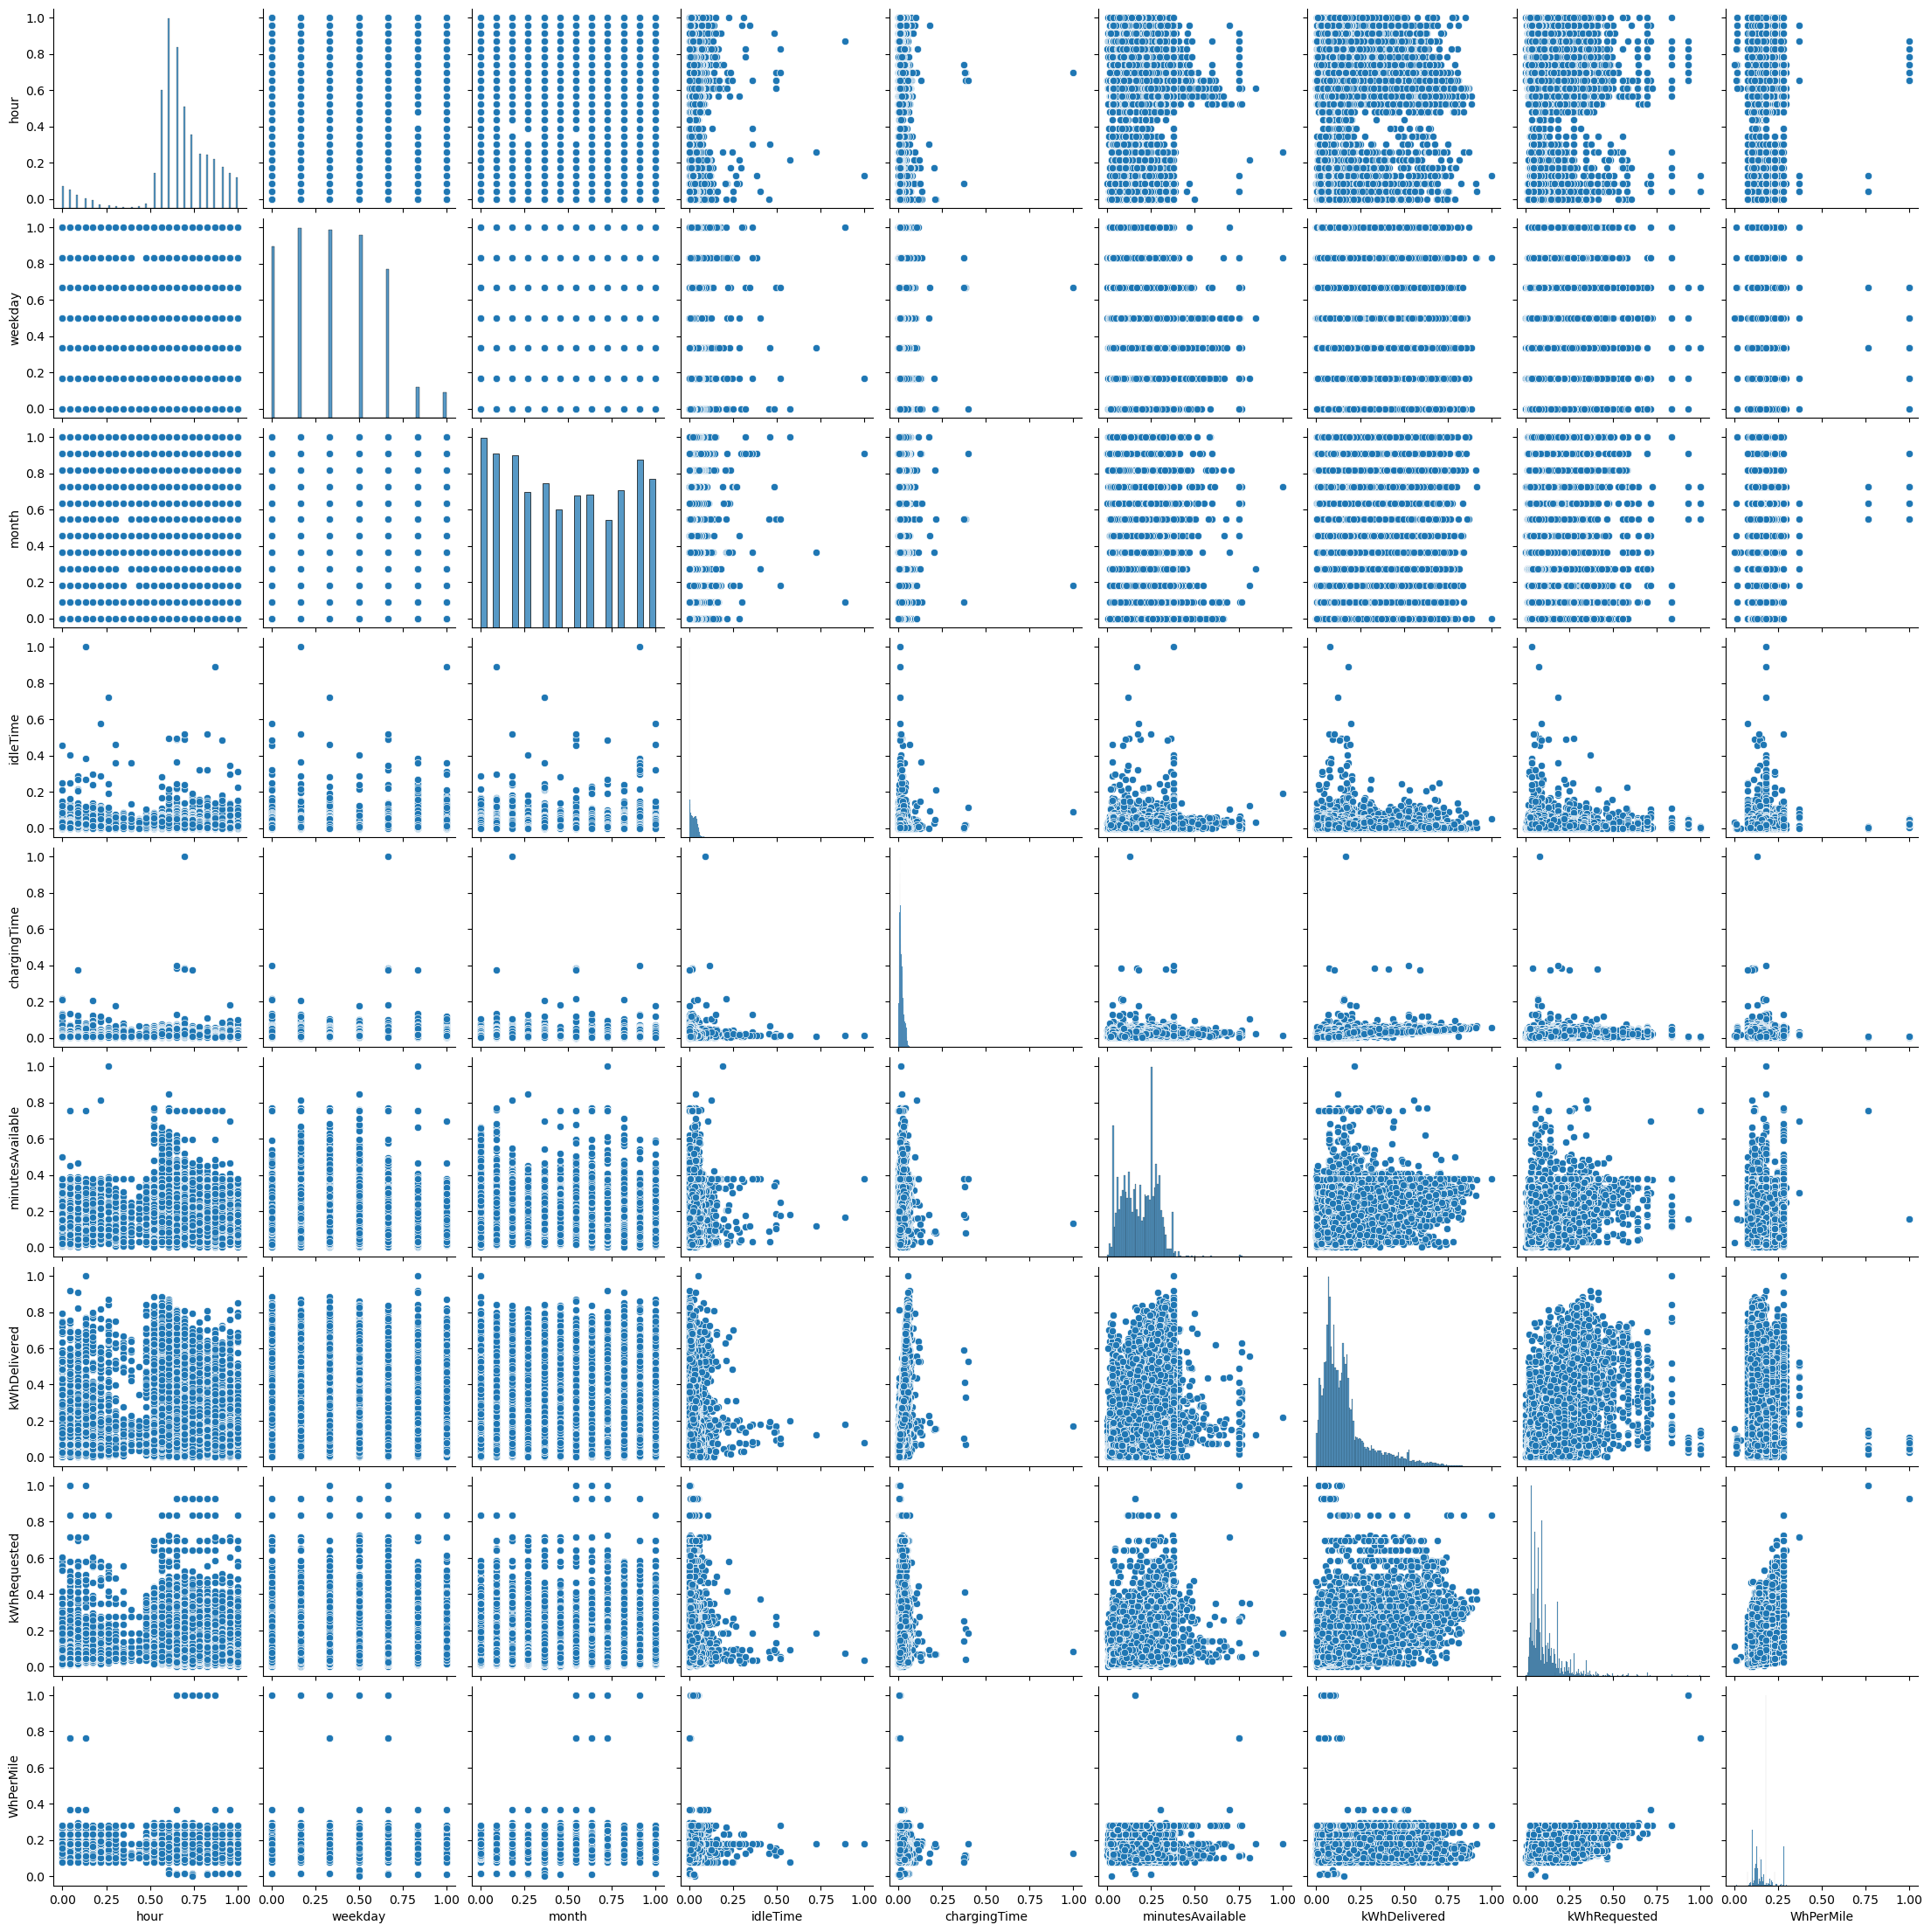

In [140]:

sns.pairplot(data=data_scaled)
plt.show()


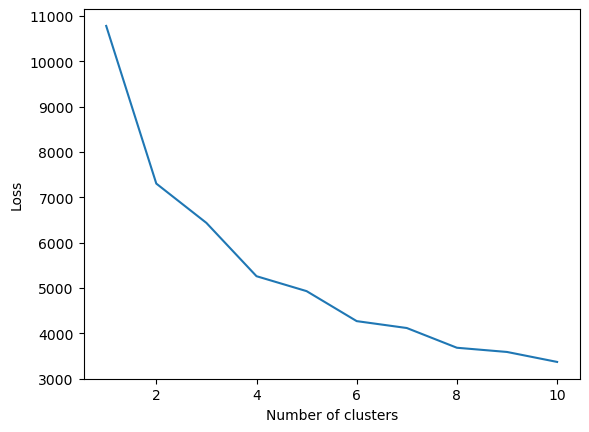

In [141]:
from sklearn.cluster import KMeans
k_max = 10
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(data_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

### 4 clusters seem reasonable

C:\Users\berra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\berra\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


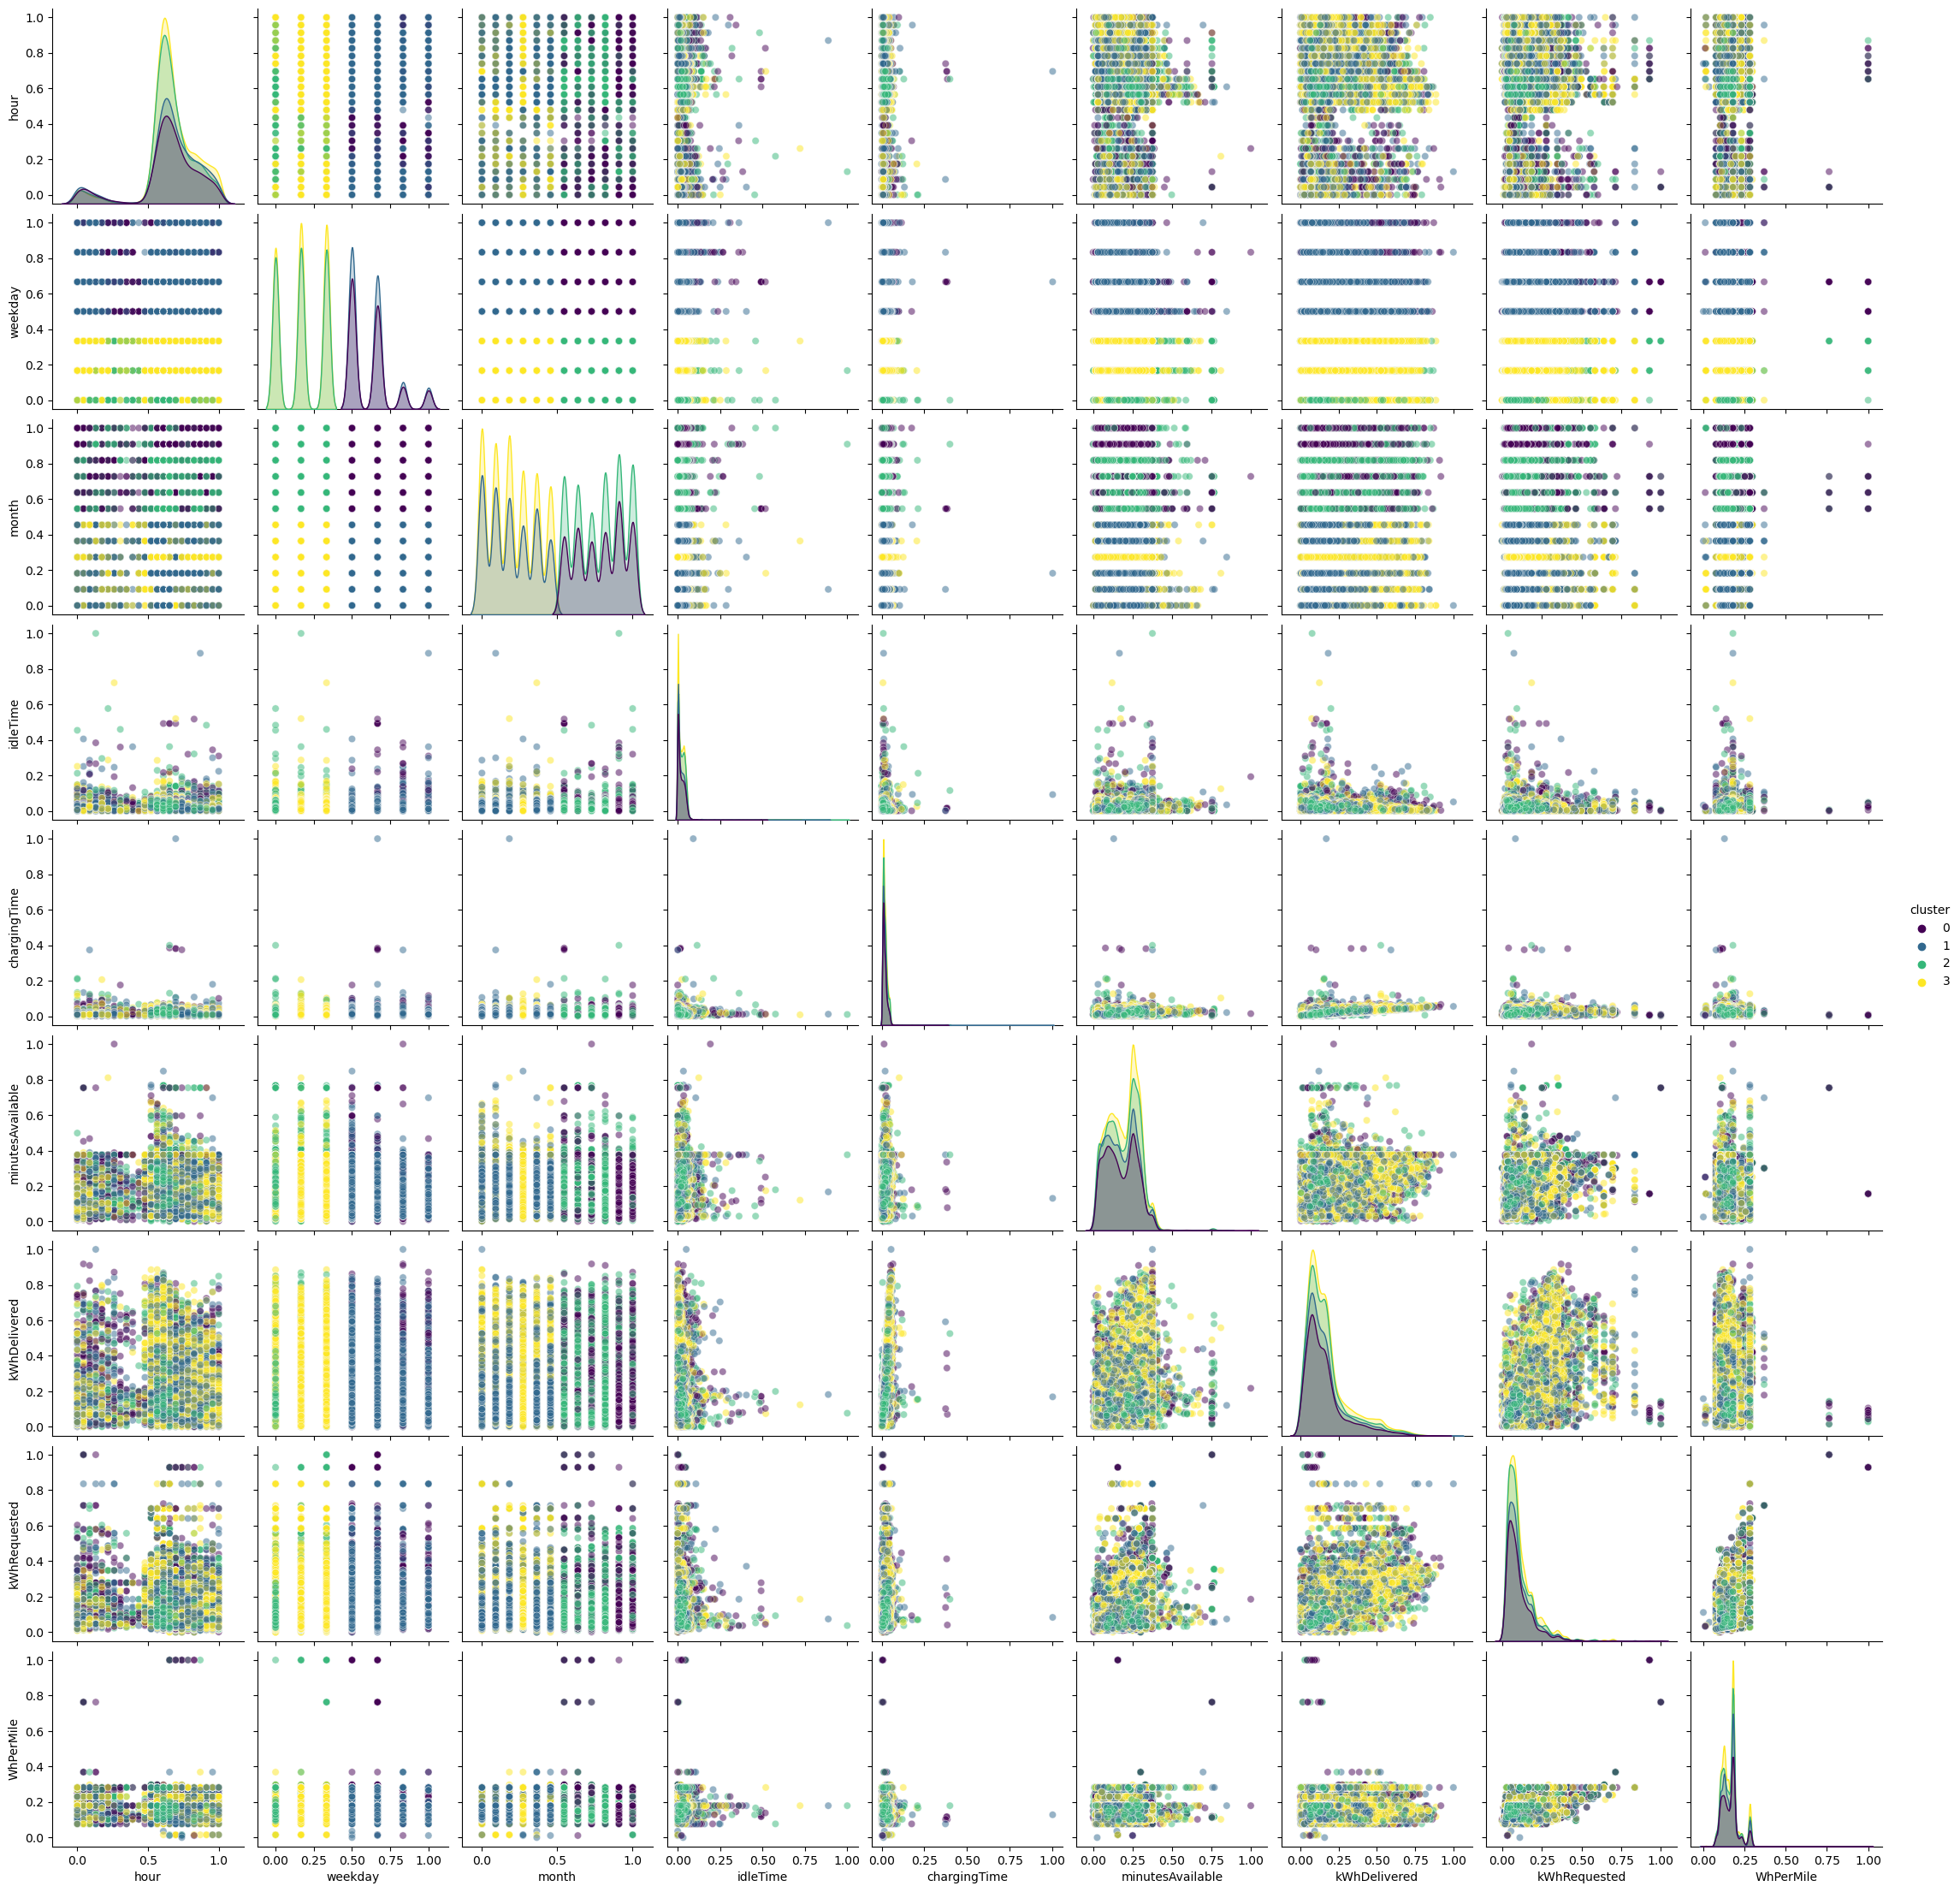

In [142]:
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming data_scaled is your DataFrame with scaled features
# You can choose the optimal number of clusters based on the elbow method, silhouette score, etc.
k = 4 # Adjust this based on your analysis

# Fit k-means clustering model
kmeans = KMeans(n_clusters=k, random_state=42)
data_scaled['cluster'] = kmeans.fit_predict(data_scaled)

# Create a pairplot with different colors for each cluster
sns.pairplot(data_scaled, hue='cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.show()


Lets try out three clusters:

C:\Users\berra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\berra\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


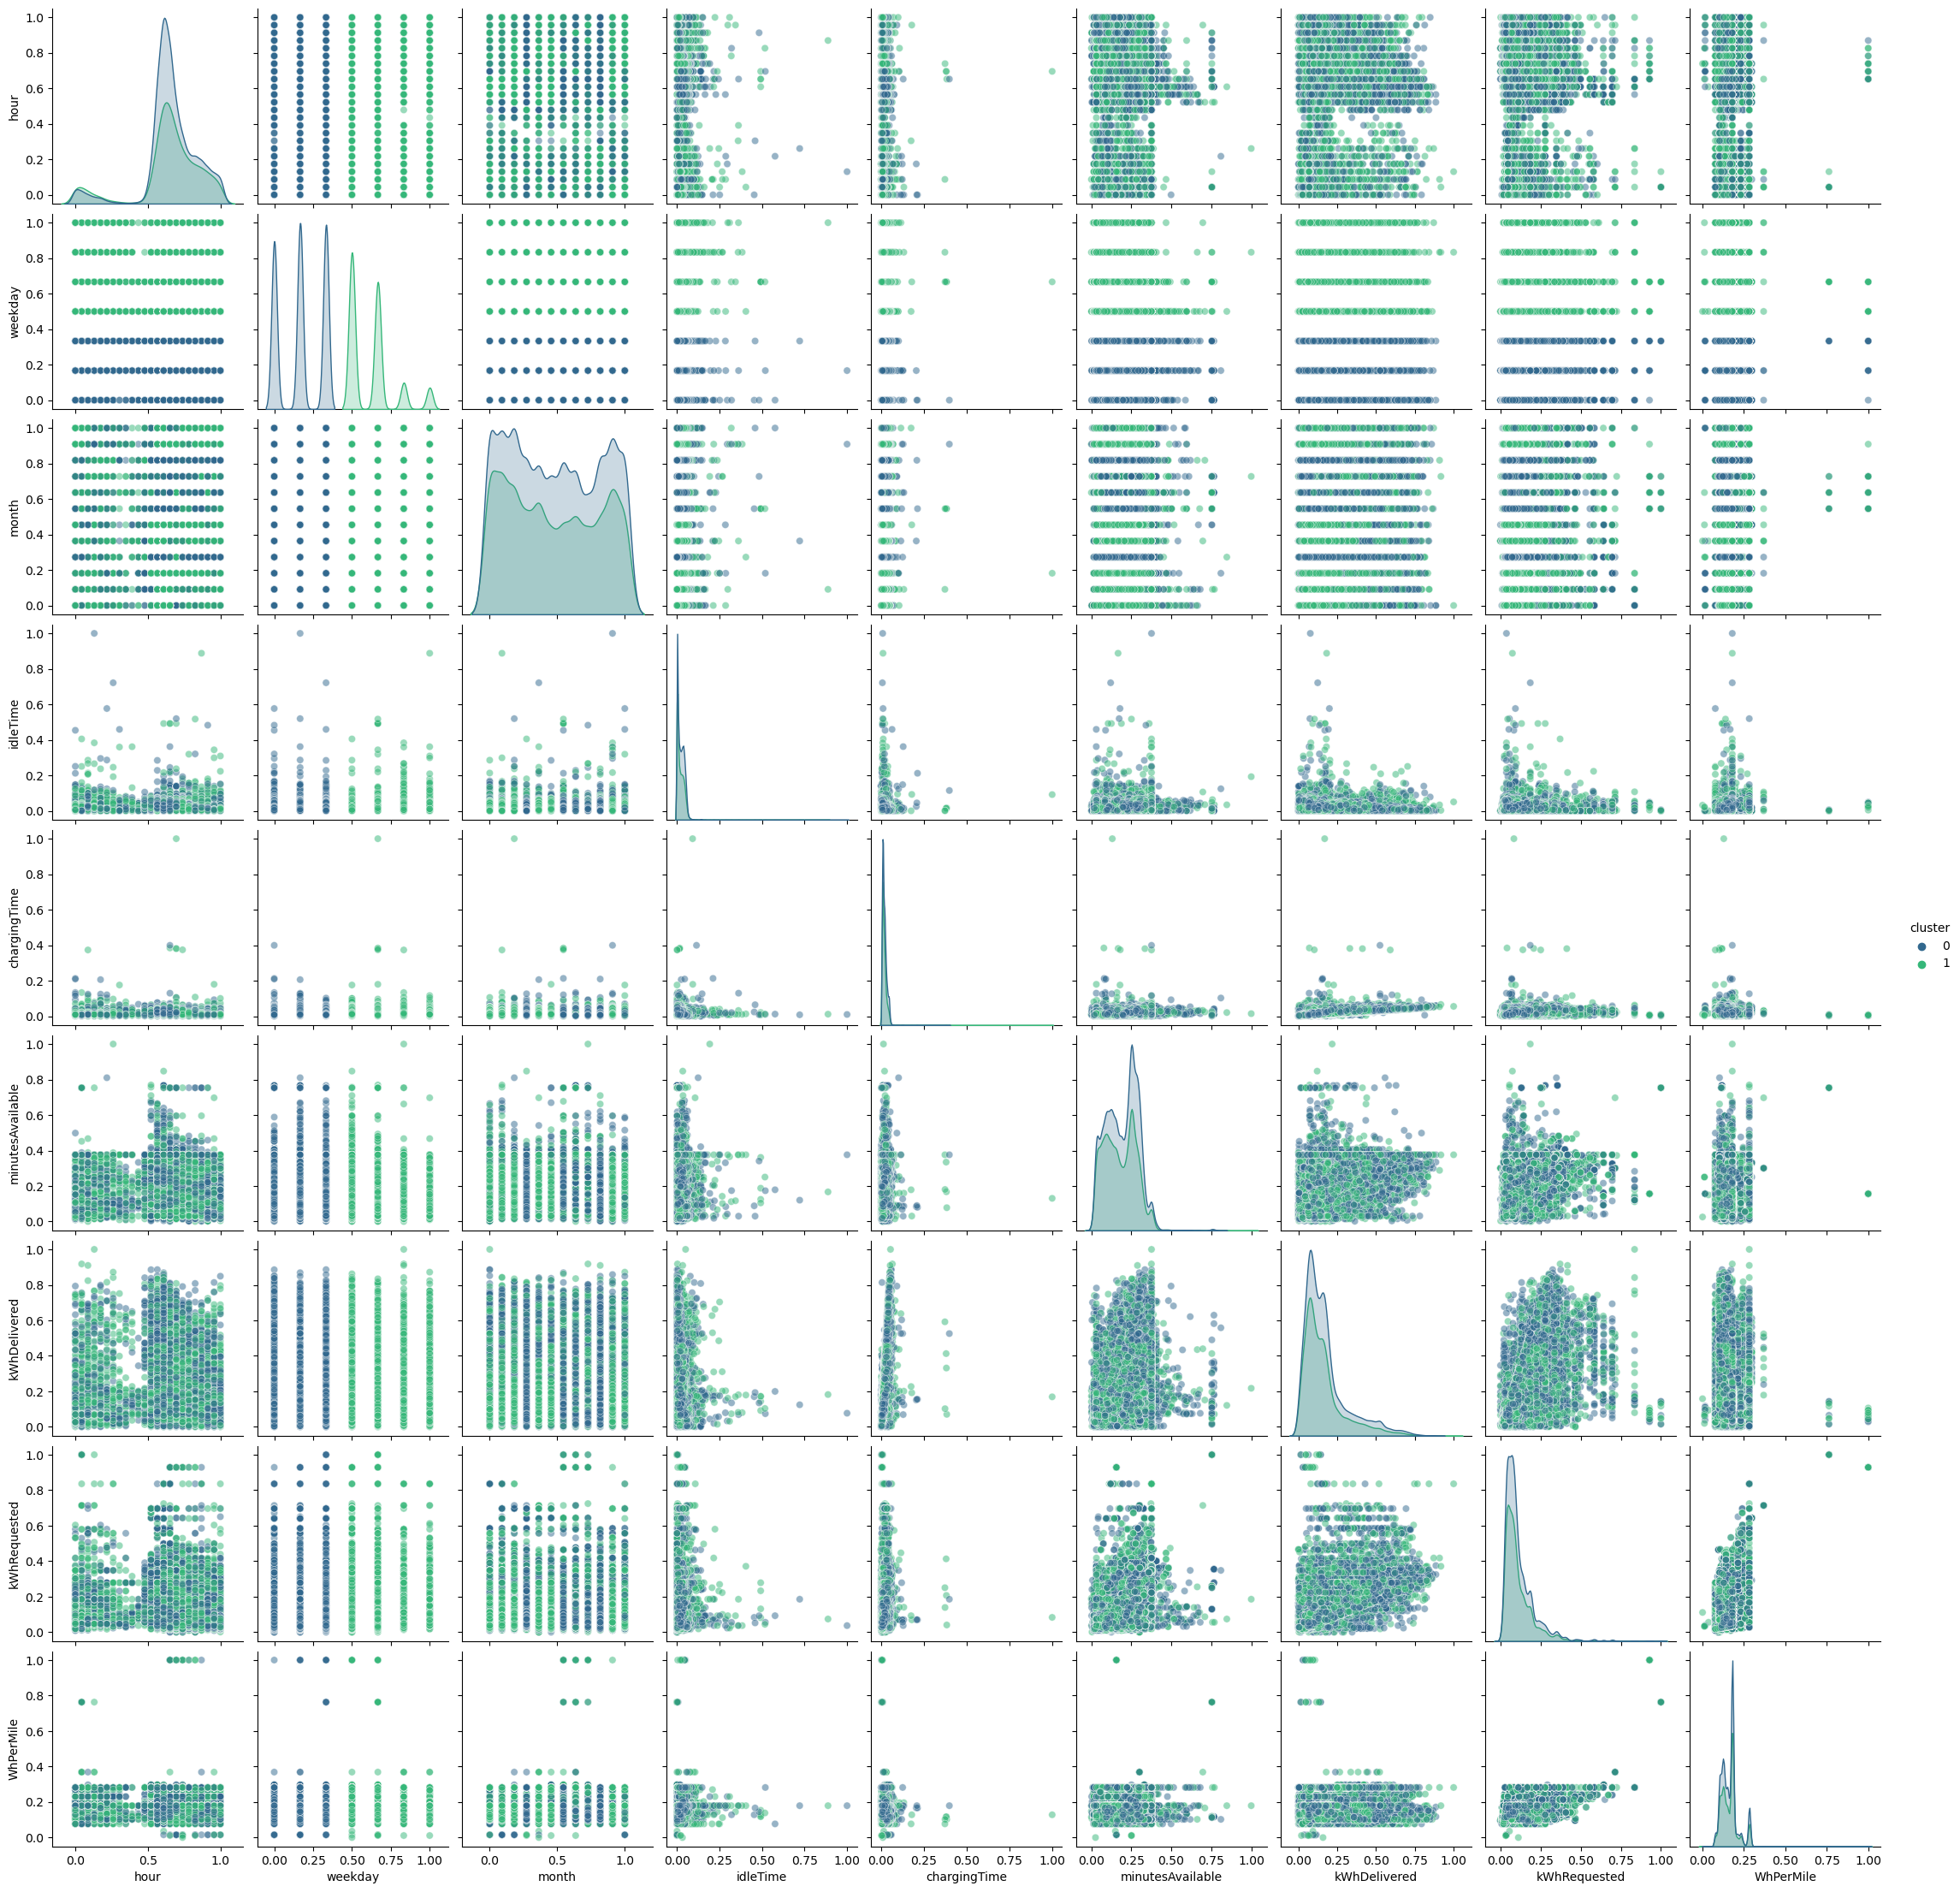

In [143]:
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming data_scaled is your DataFrame with scaled features
# You can choose the optimal number of clusters based on the elbow method, silhouette score, etc.
k = 2 # Adjust this based on your analysis

# Fit k-means clustering model
kmeans = KMeans(n_clusters=k, random_state=42)
data_scaled['cluster'] = kmeans.fit_predict(data_scaled)

# Create a pairplot with different colors for each cluster
sns.pairplot(data_scaled, hue='cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.show()


### HOUR

In [144]:
data_scaled_hour=data_scaled.drop(['month','weekday'],axis=1)

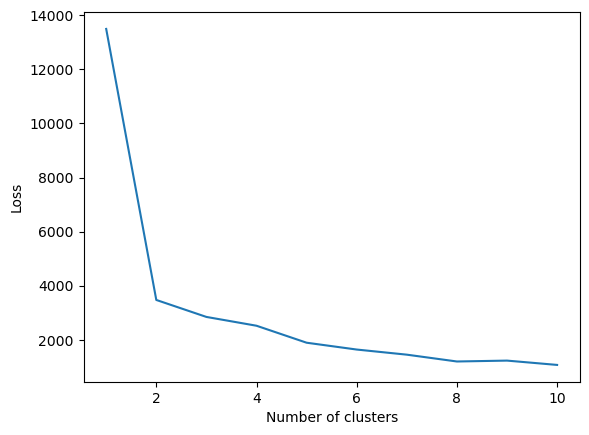

In [148]:
from sklearn.cluster import KMeans
k_max = 10
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1, n_init='auto')
    model.fit(data_scaled_hour)
    clusters.append(k+1)
    losses.append(model.inertia_)

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

C:\Users\berra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\berra\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


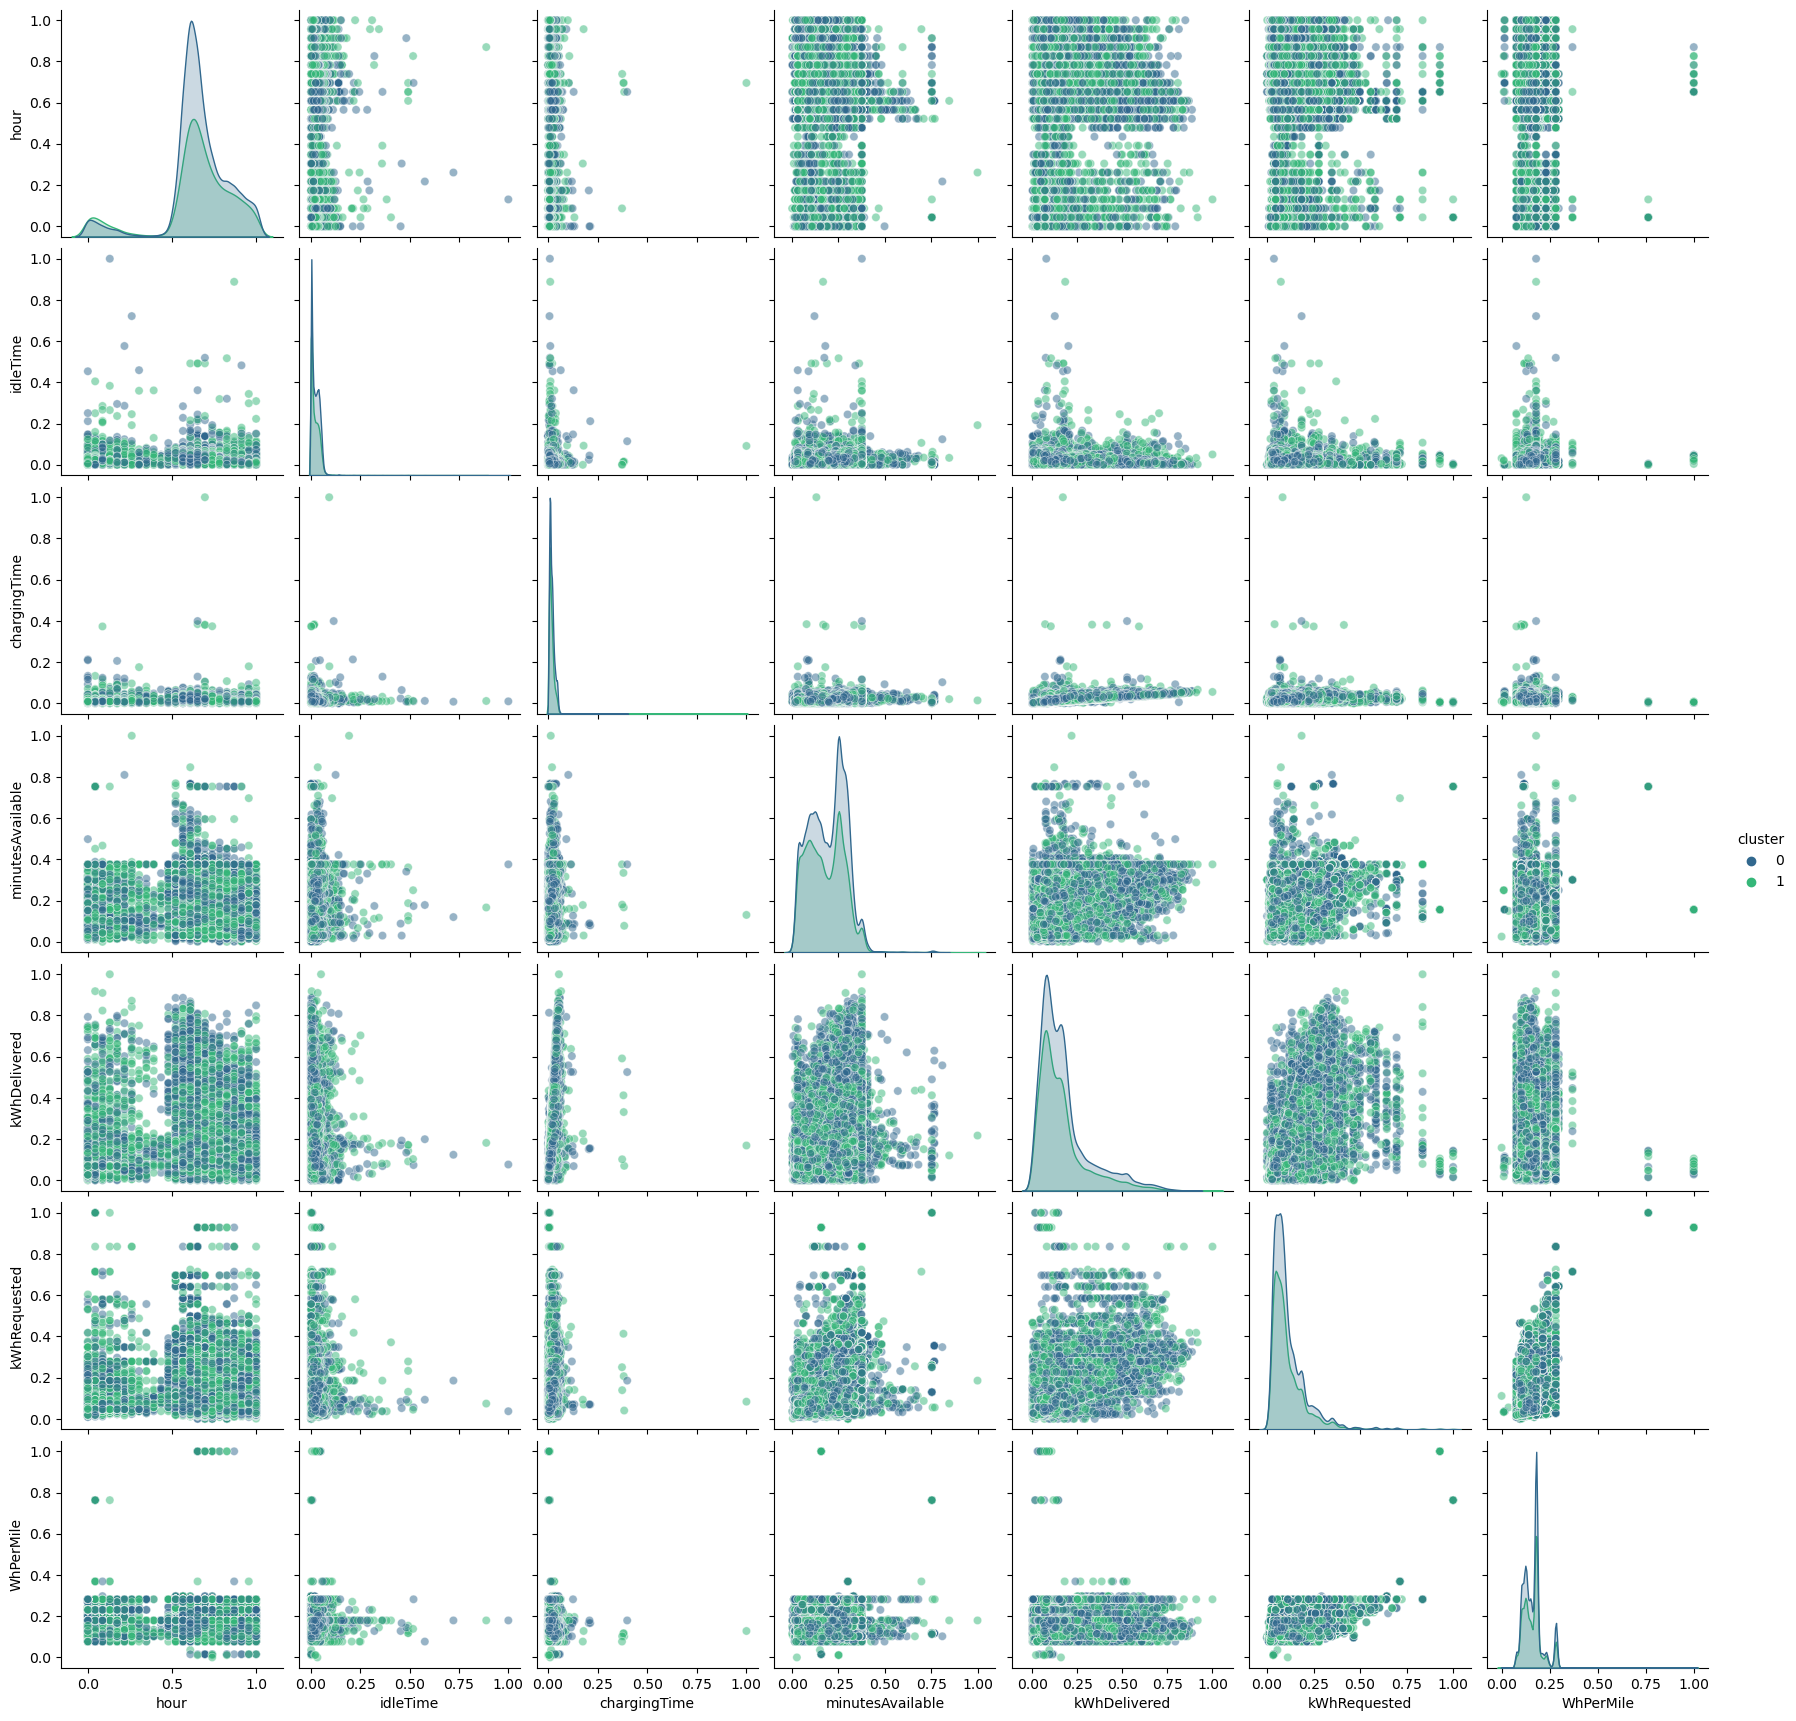

In [147]:
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming data_scaled is your DataFrame with scaled features
# You can choose the optimal number of clusters based on the elbow method, silhouette score, etc.
k = 2 # Adjust this based on your analysis

# Fit k-means clustering model
kmeans = KMeans(n_clusters=k, random_state=42)
data_scaled['cluster'] = kmeans.fit_predict(data_scaled_hour)

# Create a pairplot with different colors for each cluster
sns.pairplot(data_scaled_hour, hue='cluster', palette='viridis', plot_kws={'alpha': 0.5})
plt.show()


### Utilization df

For utilization prediction we will exclude any data after March 2020 due to the Corona pandemic. We argue, that due to lockdowns and a shift to homeoffice whereever possible, the rest of 2020 is not relevant to the situation we have today. While homeoffice is generally more accepted nowadays, we are beginning to see a lot of companies enforcing a return to the office.
While the data is beginning to normalize at the beginning of 2021, we do not have any weather data after this point. Attempts to find additional data for the burbank airport where unsuccessful. Due to both of these points, there will be a hard cutoff after March 2020.

In [ ]:
data_nc = data[data['disconnectTime']<"2020-4-1"].copy()

In [ ]:
data_nc["connectionTime"].describe()

In [ ]:
data_nc["disconnectTime"].describe()

In [ ]:
date_frame = pd.DataFrame(pd.date_range(start=data_nc["connectionTime"].min(), end = data_nc["disconnectTime"].max()))

In [ ]:
data_nc

In [ ]:
date_frame

In [ ]:
data = {'date': [], 'hour': []}
for row in date_frame.itertuples():
    for i in range(24):
        data["date"].append(row[1])
        data["hour"].append(i)
frame = pd.DataFrame(data)
frame["weekday"] = frame["date"].dt.day_of_week
frame["month"] = frame["date"].dt.month

In [ ]:
frame

In [ ]:
us_ca_holidays = holidays.country_holidays(country='US', subdiv='CA')

frame["holiday"] = frame["date"].apply(lambda x: x in us_ca_holidays)

### 